In [ ]:
#Importing necessary pre-processing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df= pd.read_csv("spam.txt",encoding="latin-1")

**Basic Overview of dataset**

In [ ]:
print(df.columns)

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')


In [ ]:
print("** First five rows of the dataset **")
print()

#Dropping unncessary columns from the dataset
df=df.drop(["Unnamed: 2" , "Unnamed: 3" , "Unnamed: 4"] , axis=1)
df=df.rename(columns={"v1": "Target" , "v2": "Text"})
df.head()

** First five rows of the dataset **



,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
print("** Value Counts of Target **")
print()
print(df['Target'].value_counts())
print()
print("** Basic description of dataset **")
print()
df.describe()

** Value Counts of Target **

ham     4825
spam     747
Name: Target, dtype: int64

** Basic description of dataset **



,Target,Text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [ ]:
print(" ** Basic Information **")
print()
df.info()

 ** Basic Information **

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Target  5572 non-null   object
 1   Text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


**Preprocessing and EDA**

- Data tidak seimbang
- 86,6% adalah pesan "ham" dan sisanya 13,4% adalah pesan "spam"

In [ ]:
def without_hue(data,feature,ax):
    
    total=float(len(data))
    bars_plot=ax.patches
    
    for bars in bars_plot:
        percentage = '{:.1f}%'.format(100 * bars.get_height()/total)
        x = bars.get_x() + bars.get_width()/2.0
        y = bars.get_height()
        ax.text(x, y,(percentage,bars.get_height()),ha='center',fontweight='bold',fontsize=14)

Text(0.5, 1.0, 'Label Distribution')

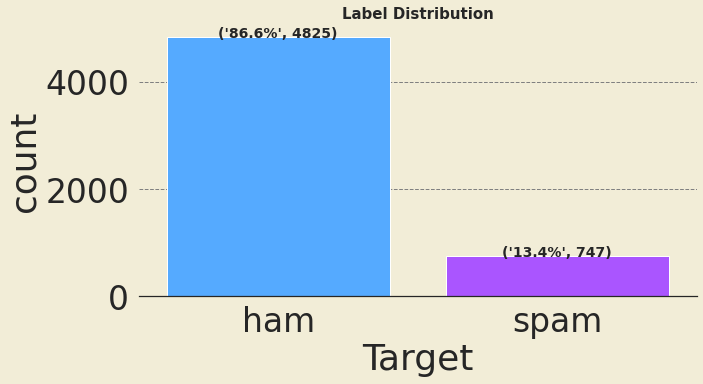

In [ ]:
#setting theme
sns.set_theme(context='notebook',style='white',font_scale=3)

#setting the background and foreground color
fig=plt.figure(figsize=(10,5))
ax=plt.axes()
ax.set_facecolor("#F2EDD7FF")
fig.patch.set_color("#F2EDD7FF")

#Dealing with spines
for i in ['left','top','right']:
    ax.spines[i].set_visible(False)
    
ax.grid(linestyle="--",axis='y',color='gray')

#countplot
a=sns.countplot(data=df,x='Target',saturation=3,palette='cool')

without_hue(df,'target',a)

plt.title("Label Distribution",weight='bold',fontsize=15)

In [ ]:
#Adding new feature 'message_length'
df['message_length']=df['Text'].apply(lambda x: len(x.split(" ")))

In [ ]:
df

,Target,Text,message_length
0,ham,"Go until jurong point, crazy.. Available only ...",20
1,ham,Ok lar... Joking wif u oni...,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28
3,ham,U dun say so early hor... U c already then say...,11
4,ham,"Nah I don't think he goes to usf, he lives aro...",13
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,30
5568,ham,Will Ì_ b going to esplanade fr home?,8
5569,ham,"Pity, * was in mood for that. So...any other s...",10
5570,ham,The guy did some bitching but I acted like i'd...,26


In [ ]:
df_ham= df["message_length"][df["Target"]=="ham"].value_counts()
df_spam=df["message_length"][df["Target"]=="spam"].value_counts()
df_ham=pd.DataFrame(df_ham)
df_spam=pd.DataFrame(df_spam)

In [ ]:
df_ham

,message_length
6,412
7,378
5,348
8,337
9,304
...,...
162,1
71,1
95,1
99,1


- Dari gambar kita dapat menyimpulkan bahwa pesan spam lebih panjang daripada pesan ham

Text(0, 0.5, 'Message Length Frequencies')

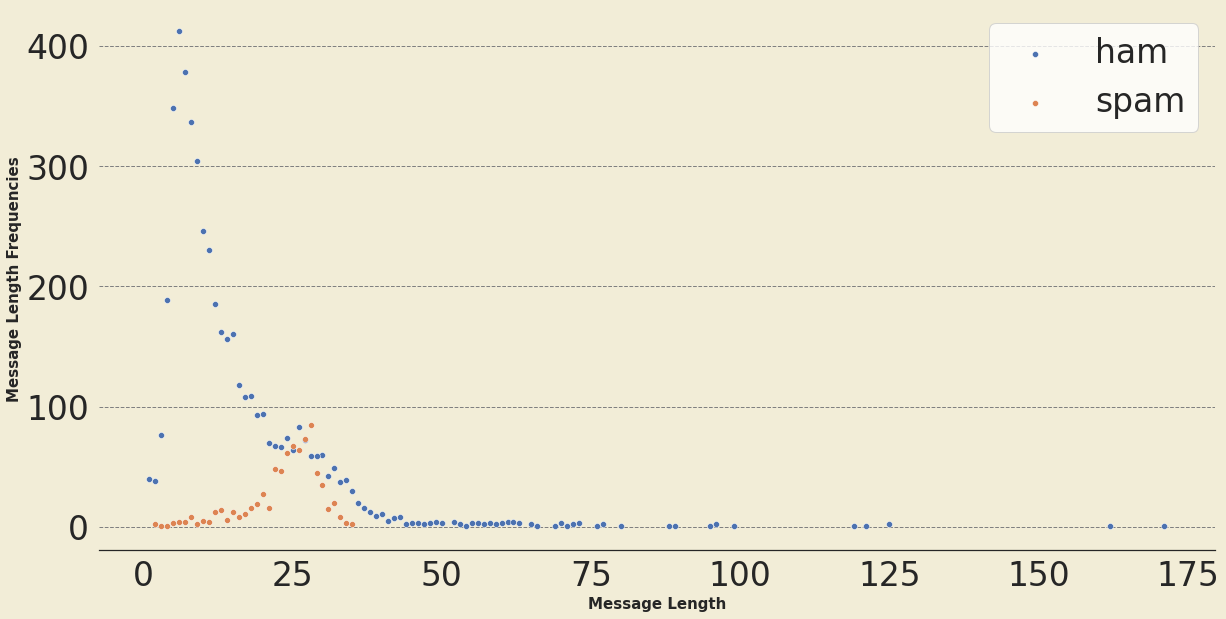

In [ ]:
fig=plt.figure(figsize=(20,10))
fig.patch.set_color("#F2EDD7FF")

ax=plt.axes()
ax.set_facecolor("#F2EDD7FF")
fig.patch.set_color("#F2EDD7FF")

#Dealing with spines
for i in ['left','top','right']:
    ax.spines[i].set_visible(False)
    
ax.grid(linestyle="--",axis='y',color='gray')



sns.scatterplot(data=df_ham,x=df_ham.index,y=df_ham['message_length'],label="ham")
sns.scatterplot(data=df_spam,x=df_spam.index,y=df_spam['message_length'],label='spam')
plt.xlabel("Message Length",fontsize=15,fontweight='bold')
plt.ylabel("Message Length Frequencies",fontsize=15,fontweight='bold')

**Data Cleaning**

In [ ]:
import re
import string

In [ ]:
#Using regex functions to clean the text

def text_cleaning(text):
    
    #Converting text into lowercase
    text = str(text).lower()
    
    #Removing square brackets from the text
    text = re.sub('\[.*?\]','',text)
    
    
    #Removing links starting with (https or www)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    
    #Removing <"text"> type of text 
    text = re.sub('<.*?>+','',text)
    
    #Removing punctuations
    text = re.sub("[%s]" % re.escape(string.punctuation),'',text)
    
    #Removing new lines
    text = re.sub("\n",'',text)
    
    #Removing alphanumeric numbers 
    text = re.sub('\w*\d\w*','',text)
    
    return(text)

In [ ]:
#Applying 'text_cleaning' function on the dataset
df['cleaned_text']=df['Text'].apply(text_cleaning)


df.head()

,Target,Text,message_length,cleaned_text
0,ham,"Go until jurong point, crazy.. Available only ...",20,go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,6,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28,free entry in a wkly comp to win fa cup final...
3,ham,U dun say so early hor... U c already then say...,11,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",13,nah i dont think he goes to usf he lives aroun...


In [ ]:
print("***** First five sentences of the cleaned and uncleaned text *****")
print()
for i in range(0,5):
    print("Uncleaned sentence ==>",i+1 , ".", df["Text"][i])
    print("Cleaned sentence ==>",i+1,".", df['cleaned_text'][i])
    print()

***** First five sentences of the cleaned and uncleaned text *****

Uncleaned sentence ==> 1 . Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
Cleaned sentence ==> 1 . go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat

Uncleaned sentence ==> 2 . Ok lar... Joking wif u oni...
Cleaned sentence ==> 2 . ok lar joking wif u oni

Uncleaned sentence ==> 3 . Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
Cleaned sentence ==> 3 . free entry in  a wkly comp to win fa cup final tkts  may  text fa to  to receive entry questionstd txt ratetcs apply 

Uncleaned sentence ==> 4 . U dun say so early hor... U c already then say...
Cleaned sentence ==> 4 . u dun say so early hor u c already then say

Uncleaned sentence ==> 5 . Nah I don't think he goes to usf, he lives around here t

**Removing Stopwords**

In [ ]:
# Setup
!pip install -q wordcloud
import wordcloud

import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') 

import pandas as pd
import matplotlib.pyplot as plt
import io
import unicodedata
import numpy as np
import re
import string

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

wordnet = WordNetLemmatizer()
def remove_stopwords(text):
    text = text.split()
    text = [wordnet.lemmatize(word) for word in text if word not in set(stopwords.words('english'))]
    text = " ".join(text)
    return(text)

df['cleaned_text']=df['cleaned_text'].apply(remove_stopwords)

In [ ]:
print("***** Dataset after lemmatizing and removing stop words *****")
print()
df.head()

***** Dataset after lemmatizing and removing stop words *****



,Target,Text,message_length,cleaned_text
0,ham,"Go until jurong point, crazy.. Available only ...",20,go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,6,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28,free entry wkly comp win fa cup final tkts may...
3,ham,U dun say so early hor... U c already then say...,11,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",13,nah dont think go usf life around though


In [ ]:
df=df.drop(['Text'],axis=1)

In [ ]:
df_ham_cleaned= df[df["Target"]=="ham"]
df_spam_cleaned=df[df["Target"]=="spam"]
df_ham_cleaned=pd.DataFrame(df_ham_cleaned)
df_spam_cleaned=pd.DataFrame(df_spam_cleaned)

In [ ]:
df_ham_cleaned

,Target,message_length,cleaned_text
0,ham,20,go jurong point crazy available bugis n great ...
1,ham,6,ok lar joking wif u oni
3,ham,11,u dun say early hor u c already say
4,ham,13,nah dont think go usf life around though
6,ham,16,even brother like speak treat like aid patent
...,...,...,...
5565,ham,3,huh lei
5568,ham,8,ì b going esplanade fr home
5569,ham,10,pity mood soany suggestion
5570,ham,26,guy bitching acted like id interested buying s...


In [ ]:
para_ham = " ".join([word for word in df_ham_cleaned['cleaned_text']])
para_spam = " ".join([word for word in df_spam_cleaned['cleaned_text']])

**Word Cloud dari pesan non-spam**

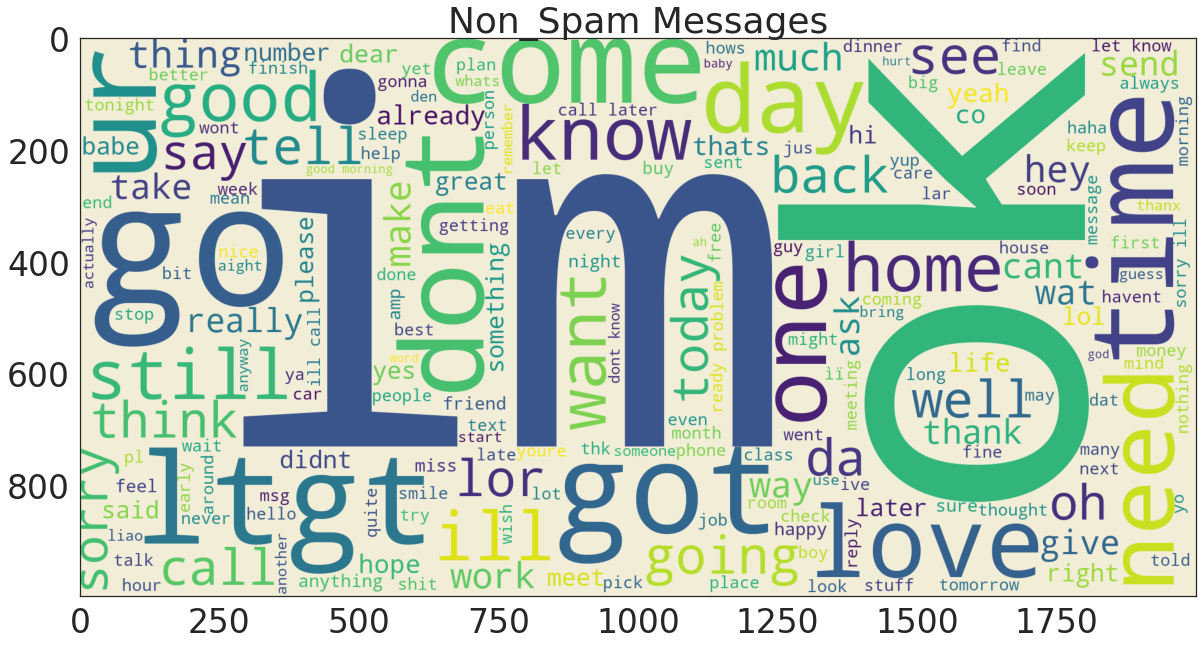

In [ ]:
from wordcloud import WordCloud

wordcloud=WordCloud(width=2000,height=1000,background_color='#F2EDD7FF').generate(para_ham)

plt.figure(figsize=(20,30))
plt.imshow(wordcloud)
plt.title("Non_Spam Messages")
plt.show()

**Word Cloud dari pesan spam**

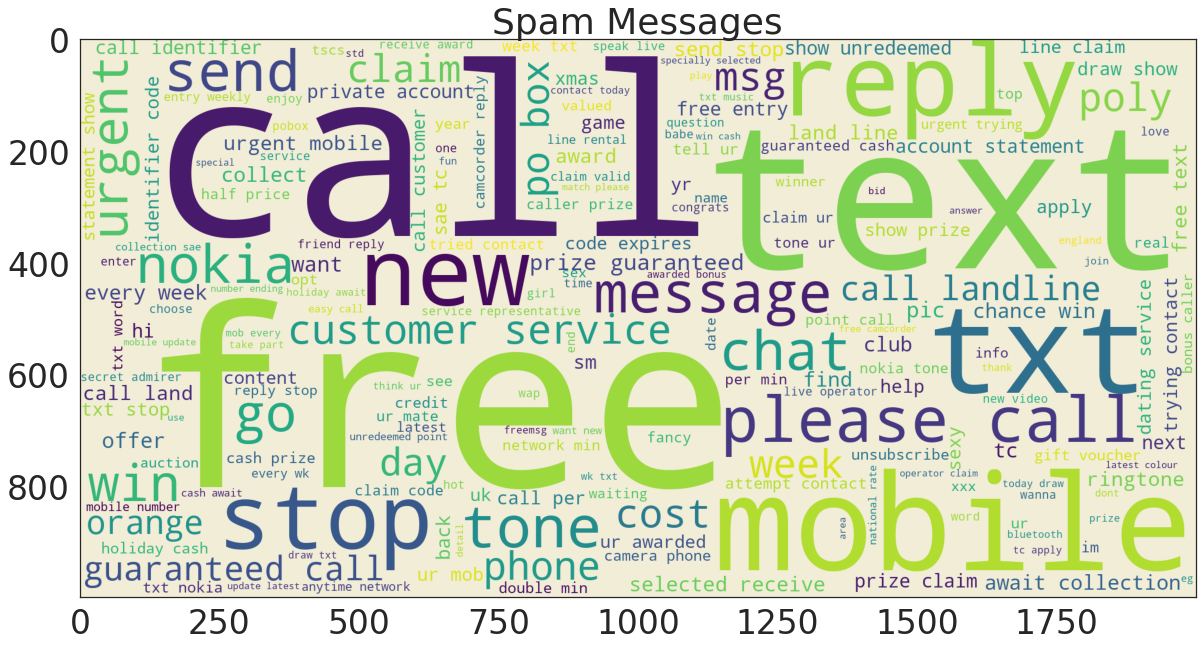

In [ ]:
from wordcloud import WordCloud

wordcloud=WordCloud(width=2000,height=1000,background_color='#F2EDD7FF').generate(para_spam)

plt.figure(figsize=(20,30))
plt.imshow(wordcloud)
plt.title("Spam Messages")
plt.show()

**Pemodelan dengan Metode Bag of Words**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()
df['Target']=le.fit_transform(df["Target"])
df.head()

,Target,message_length,cleaned_text
0,0,20,go jurong point crazy available bugis n great ...
1,0,6,ok lar joking wif u oni
2,1,28,free entry wkly comp win fa cup final tkts may...
3,0,11,u dun say early hor u c already say
4,0,13,nah dont think go usf life around though


In [ ]:
x=df['cleaned_text']
y=df['Target']
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42)

In [ ]:
print("*** Size of x_train ***",x_train.shape)
print("*** Size of y_train ***",y_train.shape)
print("*** Size of x_test *** ",x_test.shape)
print("*** Size of y_test *** ",y_test.shape)

*** Size of x_train *** (4179,)
*** Size of y_train *** (4179,)
*** Size of x_test ***  (1393,)
*** Size of y_test ***  (1393,)


In [ ]:
cv=CountVectorizer()
vect=cv.fit(x_train)
x_train_vector=vect.transform(x_train)
x_test_vector=vect.transform(x_test)

In [ ]:
print("**** Shape of training dataset after vectorization ****" , x_train_vector.shape)
print("**** Shape of test dataset after vectorization ****" , x_test_vector.shape)

**** Shape of training dataset after vectorization **** (4179, 6388)
**** Shape of test dataset after vectorization **** (1393, 6388)



**Menggunakan algoritma pembelajaran mesin**

- Naive Bayes
- Decision Tree Classifier
- SVM
- RandomForest CLassifier
- XGBoost

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
import xgboost as xgb
from sklearn import svm
from sklearn.metrics import accuracy_score , classification_report

In [ ]:
lis=[]
def modelling(dic):
    for models in dic:
        print("**** Training with", models , "algorithm ****")
        dic[models].fit(x_train_vector,y_train)
        print("**** Predicting with",models , "algorithm ****")
        print("......")
        pred=dic[models].predict(x_test_vector)
        print()
        print("**** Getting Accuracy of" , models , "algorithm ****")
        print("......")
        print(accuracy_score(y_test,pred))
        lis.append(accuracy_score(y_test,pred))
        print("......")
        print("**** Getting Classification report of", models , "algorithm ****")
        print()
        print(classification_report(y_test,pred))
        print("----------------------------------------------------------------")
        print()

In [ ]:
dic={"Naive Bayes": MultinomialNB(),"Decision Tree": DecisionTreeClassifier(random_state=42),"SVM":svm.SVC(),
     "Random Forest":RandomForestClassifier(n_estimators=200,random_state=42),"XGB":xgb.XGBClassifier(n_estimators=80),
      }

In [ ]:
modelling(dic)

**** Training with Naive Bayes algorithm ****
**** Predicting with Naive Bayes algorithm ****
......

**** Getting Accuracy of Naive Bayes algorithm ****
......
0.9784637473079684
......
**** Getting Classification report of Naive Bayes algorithm ****

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1202
           1       0.95      0.88      0.92       191

    accuracy                           0.98      1393
   macro avg       0.97      0.94      0.95      1393
weighted avg       0.98      0.98      0.98      1393

----------------------------------------------------------------

**** Training with Decision Tree algorithm ****
**** Predicting with Decision Tree algorithm ****
......

**** Getting Accuracy of Decision Tree algorithm ****
......
0.9655419956927495
......
**** Getting Classification report of Decision Tree algorithm ****

              precision    recall  f1-score   support

           0       0.97      0.99     

In [ ]:
models_dataframe=pd.DataFrame({
    "Models":["Naive Bayes" , "Decision Tree" , "SVM" , "Random Forest" , "XGBoost"] ,
    "Accuracy_score":[i for i in lis]
})

In [ ]:
models_dataframe

,Models,Accuracy_score
0,Naive Bayes,0.978464
1,Decision Tree,0.965542
2,SVM,0.971285
3,Random Forest,0.973439
4,XGBoost,0.947595


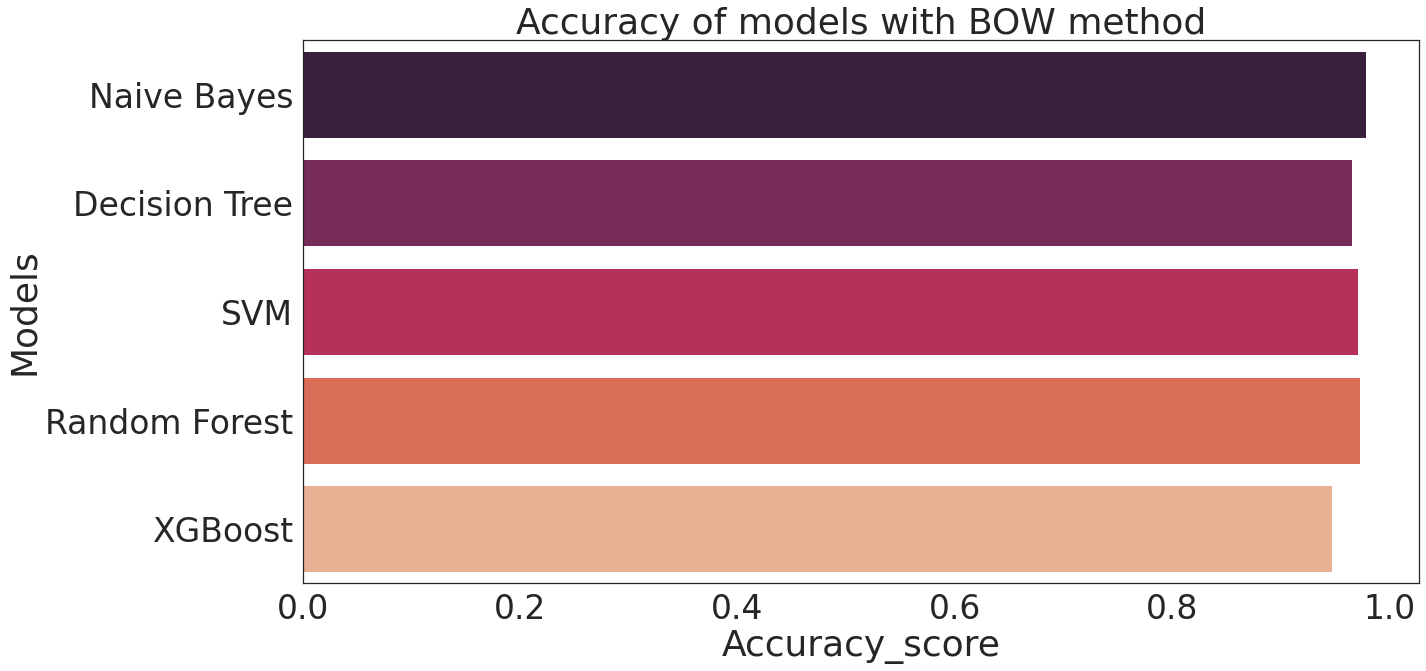

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(y=models_dataframe['Models'],x=models_dataframe['Accuracy_score'],palette='rocket')
plt.title("Accuracy of models with BOW method")
plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

#Usinf TF-IDF method
tf=TfidfVectorizer()
tf_vect=tf.fit(x_train)
x_train_vector_tf= tf_vect.transform(x_train)
x_test_vector_tf=tf_vect.transform(x_test)

print("**** Shape of training dataset after vectorization ****" , x_train_vector.shape)
print("**** Shape of test dataset after vectorization ****" , x_test_vector.shape)

**** Shape of training dataset after vectorization **** (4179, 6388)
**** Shape of test dataset after vectorization **** (1393, 6388)


In [ ]:
lis_tf=[]
def modelling_tf(dic):
    for models in dic:
        print("**** Training with", models , "algorithm ****")
        dic[models].fit(x_train_vector_tf,y_train)
        print("**** Predicting with",models , "algorithm ****")
        print("......")
        pred=dic[models].predict(x_test_vector_tf)
        print()
        print("**** Getting Accuracy of" , models , "algorithm ****")
        print("......")
        print(accuracy_score(y_test,pred))
        lis_tf.append(accuracy_score(y_test,pred))
        print("......")
        print("**** Getting Classification report of", models , "algorithm ****")
        print()
        print(classification_report(y_test,pred))
        print("----------------------------------------------------------------")
        print()
        
dic={"Naive Bayes": MultinomialNB(),"Decision Tree": DecisionTreeClassifier(random_state=42),"SVM":svm.SVC(),
     "Random Forest":RandomForestClassifier(n_estimators=200,random_state=42),"XGB":xgb.XGBClassifier(n_estimators=80),
      }

In [ ]:
modelling_tf(dic)

**** Training with Naive Bayes algorithm ****
**** Predicting with Naive Bayes algorithm ****
......

**** Getting Accuracy of Naive Bayes algorithm ****
......
0.9605168700646087
......
**** Getting Classification report of Naive Bayes algorithm ****

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1202
           1       1.00      0.71      0.83       191

    accuracy                           0.96      1393
   macro avg       0.98      0.86      0.90      1393
weighted avg       0.96      0.96      0.96      1393

----------------------------------------------------------------

**** Training with Decision Tree algorithm ****
**** Predicting with Decision Tree algorithm ****
......

**** Getting Accuracy of Decision Tree algorithm ****
......
0.9475951184493898
......
**** Getting Classification report of Decision Tree algorithm ****

              precision    recall  f1-score   support

           0       0.97      0.97     

In [ ]:
models_dataframe=pd.DataFrame({
    "Models":["Naive Bayes" , "Decision Tree" , "SVM" , "Random Forest" , "XGBoost"] ,
    "Accuracy_score":[i for i in lis_tf]
})

models_dataframe

,Models,Accuracy_score
0,Naive Bayes,0.960517
1,Decision Tree,0.947595
2,SVM,0.973439
3,Random Forest,0.975592
4,XGBoost,0.945441


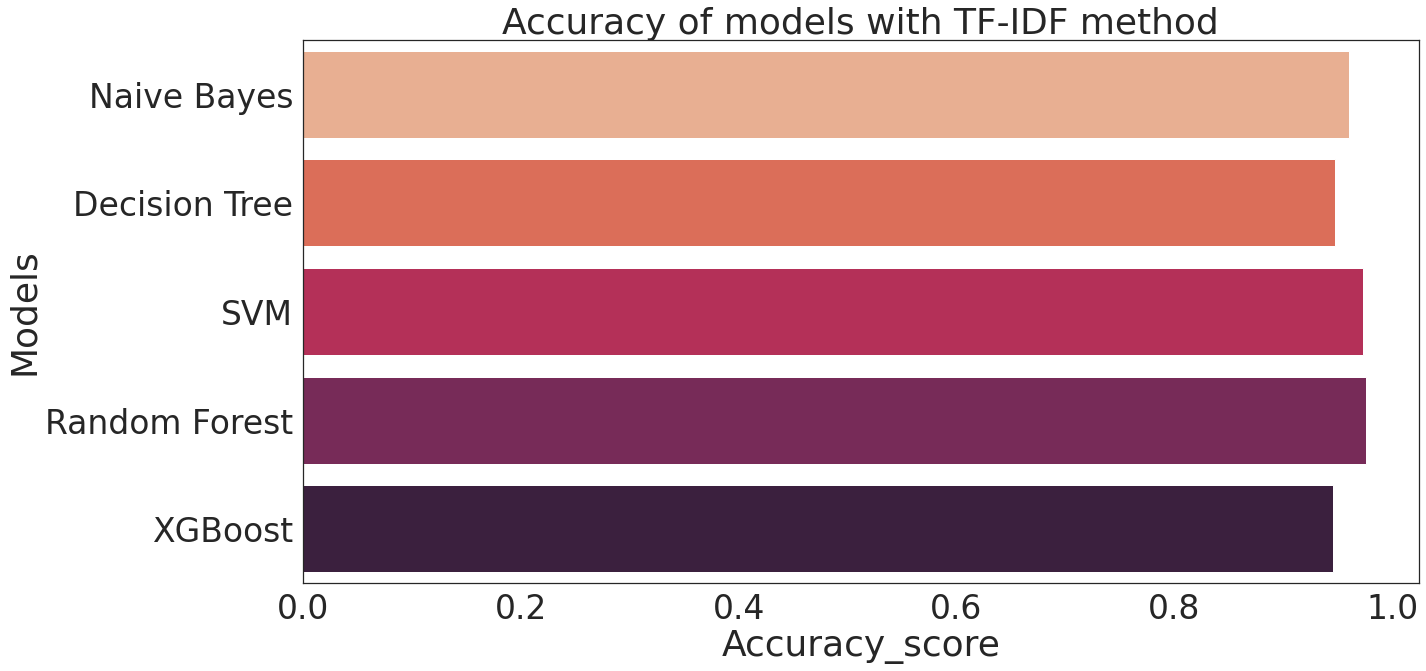

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(y=models_dataframe['Models'],x=models_dataframe['Accuracy_score'],palette='rocket_r')
plt.title("Accuracy of models with TF-IDF method")
plt.show()